In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('gene_expression.csv')
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

In [61]:
df.shape

(3000, 3)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [63]:
df.describe()

Gene One     Gene Two  Cancer Present
count  3000.000000  3000.000000     3000.000000
mean      5.600133     5.410467        0.500000
std       1.828388     1.729081        0.500083
min       1.000000     1.000000        0.000000
25%       4.300000     4.000000        0.000000
50%       5.600000     5.400000        0.500000
75%       6.900000     6.700000        1.000000
max      10.000000    10.000000        1.000000

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

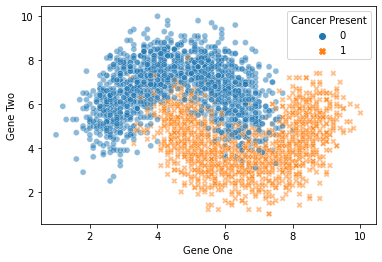

In [64]:
sns.scatterplot(data = df, x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present', alpha = 0.5, style = 'Cancer Present')
# plt.xlim(2, 6)
# plt.ylim(4, 8)

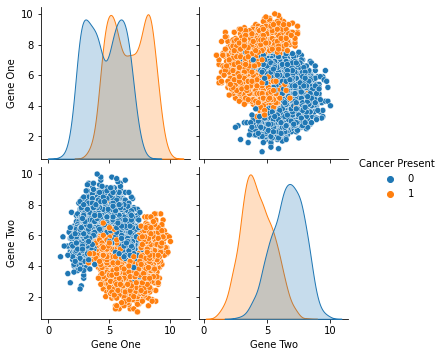

In [65]:
sns.pairplot(data = df, hue = 'Cancer Present')

In [66]:
X = df.drop('Cancer Present', axis = 1)

In [67]:
y = df['Cancer Present']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
X_train = scaler.fit_transform(X_train)

In [73]:
X_test = scaler.transform(X_test)

In [74]:
from sklearn.neighbors import  KNeighborsClassifier

In [75]:
# help(KNeighborsClassifier)

In [107]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [108]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [109]:
y_pred = knn_model.predict(X_test)

In [110]:
# y_pred

In [111]:
from sklearn.metrics import confusion_matrix, classification_report

In [112]:
confusion_matrix(y_test, y_pred)

array([[382,  41],
       [ 34, 443]], dtype=int64)

In [113]:
len(y_test)

900

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [115]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [116]:
from sklearn.metrics import accuracy_score

In [117]:
1 - accuracy_score(y_test, y_pred)

0.08333333333333337

 ### Elbow Method ###

In [118]:
test_error_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    
    test_error_rates.append(test_error)

In [119]:
# test_error_rates

Text(0.5, 0, 'K Neighbors')

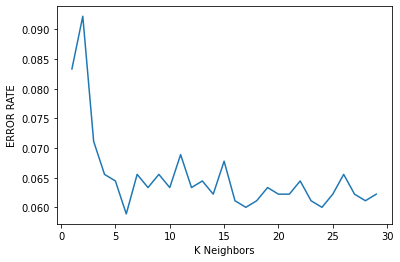

In [120]:
plt.plot(range(1, 30), test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [121]:
# PIPELINE --> GRIDSEARCH CV

In [135]:
scaler = StandardScaler()

In [136]:
knn = KNeighborsClassifier()

In [137]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [138]:
operations = [('scaler', scaler), ('knn', knn)]

In [139]:
from sklearn.pipeline import Pipeline

In [140]:
pipe = Pipeline(operations)

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
k_values = list(range(1,20))

In [143]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [144]:
param_grid = {'knn__n_neighbors' : k_values}

In [145]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')

In [146]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [148]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [150]:
full_pred = full_cv_classifier.predict(X_test)

In [151]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       423
           1       0.94      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [152]:
new_patient = [[3.8, 6.4]]

In [153]:
full_cv_classifier.predict(new_patient)

array([0], dtype=int64)

In [154]:
full_cv_classifier.predict_proba(new_patient)

array([[0.6875, 0.3125]])